# Obtaining the data

For my project, I decided to work with yelp data. Since yelp has asked that no one [scrape their website](https://www.yelp-support.com/article/Can-I-copy-or-scrape-data-from-the-Yelp-site?l=en_US), I have decided to use the [yelp challenge dataset](https://www.yelp.com/dataset/challenge) for my capstone project. 

This dataset consists of 5 json files: 
1. **tip.json**: Tips written by a user on a business. Tips are shorter than reviews and tend to convey quick suggestions.
2. **photo.json**: Contains photo data including the caption and classification (one of "food", "drink", "menu", "inside" or "outside").
3. **checkin.json**: Checkins on a business.
4. **user.json**: User data including the user's friend mapping and all the metadata associated with the user.
5. **review.json**: Contains full review text data including the user_id that wrote the review and the business_id the review is written for.
6. **business.json**: Contains business data including location data, attributes, and categories.

For the sake of my project, I will only be working with the user and review data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json 
import csv
from tqdm import tqdm

import warnings
warnings.filterwarnings("ignore")

## Review Data

In [2]:
#import json file
review = [json.loads(line) for line in open("yelp_dataset/review.json")]

In [3]:
#turn file into a DataFrame
review_df=pd.DataFrame(review)
review_df.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,ujmEBvifdJM6h6RLv4wQIg,0,2013-05-07 04:34:36,1,Q1sbwvVQXV2734tPgoKj4Q,1.0,Total bill for this horrible service? Over $8G...,6,hG7b0MtEbXx5QzbzE6C_VA
1,NZnhc2sEQy3RmzKTZnqtwQ,0,2017-01-14 21:30:33,0,GJXCdrto3ASJOqKeVWPi6Q,5.0,I *adore* Travis at the Hard Rock's new Kelly ...,0,yXQM5uF2jS6es16SJzNHfg
2,WTqjgwHlXbSFevF32_DJVw,0,2016-11-09 20:09:03,0,2TzJjDVDEuAW6MR5Vuc1ug,5.0,I have to say that this office really has it t...,3,n6-Gk65cPZL6Uz8qRm3NYw
3,ikCg8xy5JIg_NGPx-MSIDA,0,2018-01-09 20:56:38,0,yi0R0Ugj_xUx_Nek0-_Qig,5.0,Went in for a lunch. Steak sandwich was delici...,0,dacAIZ6fTM6mqwW5uxkskg
4,b1b1eb3uo-w561D0ZfCEiQ,0,2018-01-30 23:07:38,0,11a8sVPMUFtaC7_ABRkmtw,1.0,Today was my second out of three sessions I ha...,7,ssoyf2_x0EQMed6fgHeMyQ


In [4]:
#five number statitics of numerical data
review_df.describe()

,cool,funny,stars,useful
count,6.685900e+06,6.685900e+06,6.685900e+06,6.685900e+06
mean,5.787708e-01,4.827667e-01,3.716199e+00,1.354134e+00
std,2.359024e+00,2.378646e+00,1.463643e+00,3.700192e+00
min,-1.000000e+00,0.000000e+00,1.000000e+00,-1.000000e+00
25%,0.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,4.000000e+00,0.000000e+00
75%,1.000000e+00,0.000000e+00,5.000000e+00,2.000000e+00
max,5.060000e+02,1.290000e+03,5.000000e+00,1.241000e+03


In [5]:
#variable info
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6685900 entries, 0 to 6685899
Data columns (total 9 columns):
business_id    object
cool           int64
date           object
funny          int64
review_id      object
stars          float64
text           object
useful         int64
user_id        object
dtypes: float64(1), int64(3), object(5)
memory usage: 459.1+ MB


In [6]:
#number of null values
review_df.isna().sum()

business_id    0
cool           0
date           0
funny          0
review_id      0
stars          0
text           0
useful         0
user_id        0
dtype: int64

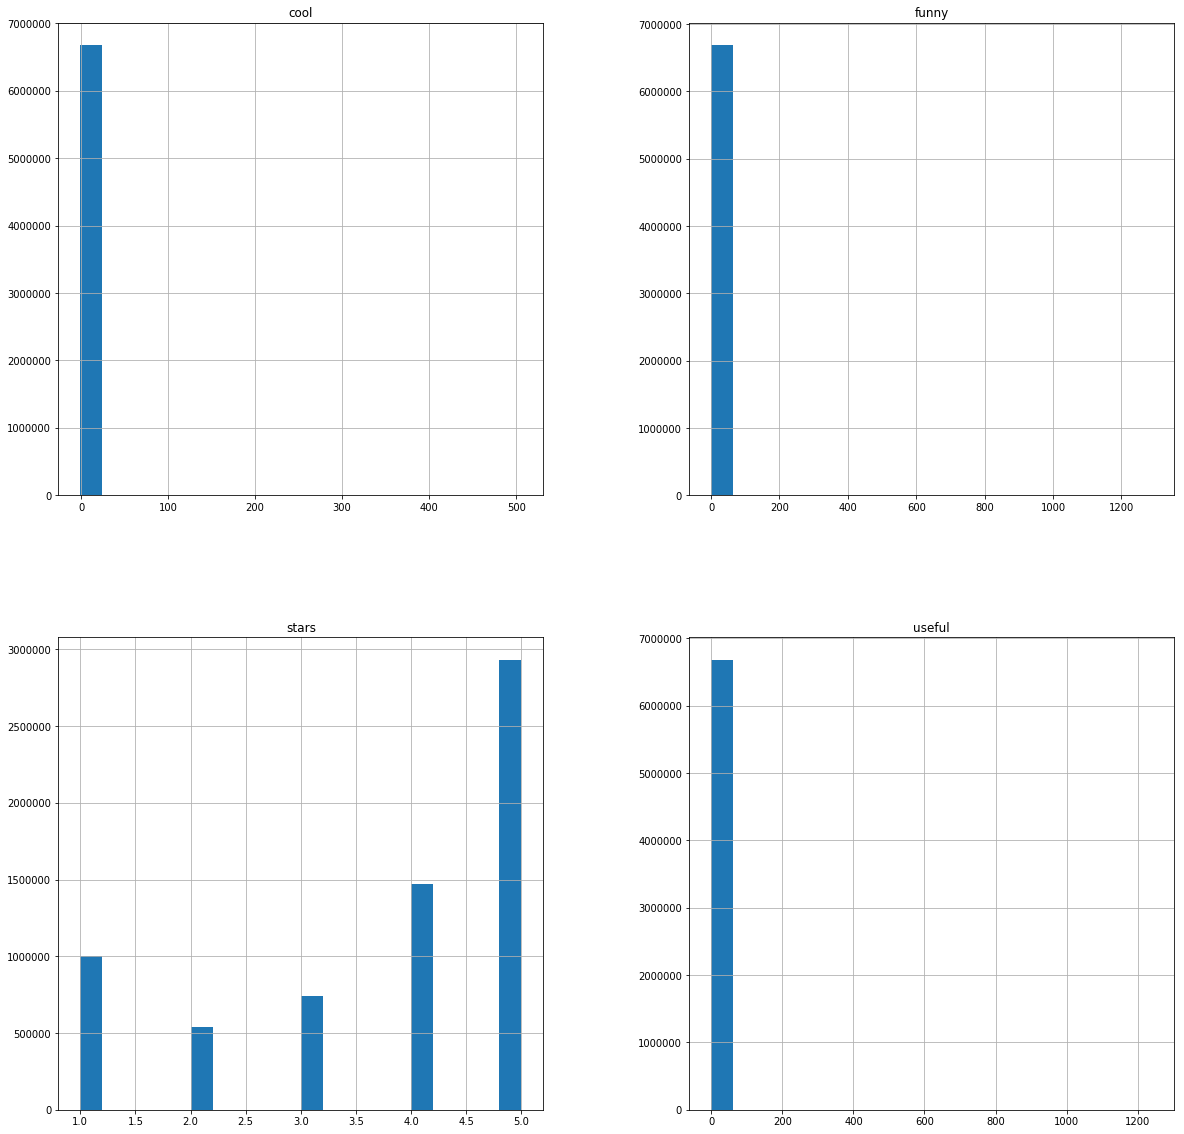

In [7]:
review_df.hist(bins=20,figsize=(20,20));

In [8]:
review_df.to_csv("review.csv",index=False)

## User Data

In [9]:
#import json file
user = [json.loads(line) for line in open("yelp_dataset/user.json")]

In [10]:
#turn file into DataFrame
user_df=pd.DataFrame(user)
user_df.head()

,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,...,cool,elite,fans,friends,funny,name,review_count,useful,user_id,yelping_since
0,4.03,1,0,1,2,0,0,1,0,1,...,25,"2015,2016,2017",5,"c78V-rj8NQcQjOI8KP3UEA, alRMgPcngYSCJ5naFRBz5g...",17,Rashmi,95,84,l6BmjZMeQD3rDxWUbiAiow,2013-10-08 23:11:33
1,3.63,1,0,1,1,0,0,0,0,0,...,16,,4,"kEBTgDvFX754S68FllfCaA, aB2DynOxNOJK9st2ZeGTPg...",22,Jenna,33,48,4XChL029mKr5hydo79Ljxg,2013-02-21 22:29:06
2,3.71,0,0,0,0,0,0,1,0,0,...,10,,0,"4N-HU_T32hLENLntsNKNBg, pSY2vwWLgWfGVAAiKQzMng...",8,David,16,28,bc8C_eETBWL0olvFSJJd0w,2013-10-04 00:16:10
3,4.85,0,0,0,1,0,0,0,0,2,...,14,,5,"RZ6wS38wnlXyj-OOdTzBxA, l5jxZh1KsgI8rMunm-GN6A...",4,Angela,17,30,dD0gZpBctWGdWo9WlGuhlA,2014-05-22 15:57:30
4,4.08,80,0,80,28,1,1,16,5,57,...,665,"2015,2016,2017,2018",39,"mbwrZ-RS76V1HoJ0bF_Geg, g64lOV39xSLRZO0aQQ6DeQ...",279,Nancy,361,1114,MM4RJAeH6yuaN8oZDSt0RA,2013-10-23 07:02:50


In [11]:
#five number statitics of numerical data
user_df.describe()

,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,compliment_profile,compliment_writer,cool,fans,funny,review_count,useful
count,1.637138e+06,1.637138e+06,1.637138e+06,1.637138e+06,1.637138e+06,1.637138e+06,1.637138e+06,1.637138e+06,1.637138e+06,1.637138e+06,1.637138e+06,1.637138e+06,1.637138e+06,1.637138e+06,1.637138e+06,1.637138e+06,1.637138e+06
mean,3.681462e+00,3.106818e+00,1.902082e-01,3.106818e+00,2.242225e+00,8.358489e-02,3.325951e-01,1.503944e+00,1.138432e+00,3.090273e+00,2.135135e-01,1.165329e+00,2.188046e+01,1.465646e+00,1.791785e+01,2.228770e+01,4.052770e+01
std,1.151040e+00,8.823263e+01,1.269798e+01,8.823263e+01,8.021821e+01,1.089557e+01,1.367850e+01,6.327596e+01,9.549144e+01,9.211418e+01,1.626675e+01,3.268262e+01,4.019675e+02,1.568317e+01,3.303504e+02,7.692236e+01,4.702421e+02
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00
50%,3.890000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00,3.000000e+00
75%,4.600000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00,3.000000e+00,1.500000e+01,1.300000e+01
max,5.000000e+00,3.226600e+04,1.365400e+04,3.226600e+04,3.416700e+04,1.266900e+04,1.350000e+04,5.783300e+04,8.260200e+04,5.210300e+04,1.417300e+04,1.544200e+04,1.486580e+05,9.538000e+03,1.302070e+05,1.327800e+04,1.542020e+05


In [12]:
#variable info
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1637138 entries, 0 to 1637137
Data columns (total 22 columns):
average_stars         1637138 non-null float64
compliment_cool       1637138 non-null int64
compliment_cute       1637138 non-null int64
compliment_funny      1637138 non-null int64
compliment_hot        1637138 non-null int64
compliment_list       1637138 non-null int64
compliment_more       1637138 non-null int64
compliment_note       1637138 non-null int64
compliment_photos     1637138 non-null int64
compliment_plain      1637138 non-null int64
compliment_profile    1637138 non-null int64
compliment_writer     1637138 non-null int64
cool                  1637138 non-null int64
elite                 1637138 non-null object
fans                  1637138 non-null int64
friends               1637138 non-null object
funny                 1637138 non-null int64
name                  1637138 non-null object
review_count          1637138 non-null int64
useful                16371

In [13]:
#number of null values
user_df.isna().sum()

average_stars         0
compliment_cool       0
compliment_cute       0
compliment_funny      0
compliment_hot        0
compliment_list       0
compliment_more       0
compliment_note       0
compliment_photos     0
compliment_plain      0
compliment_profile    0
compliment_writer     0
cool                  0
elite                 0
fans                  0
friends               0
funny                 0
name                  0
review_count          0
useful                0
user_id               0
yelping_since         0
dtype: int64

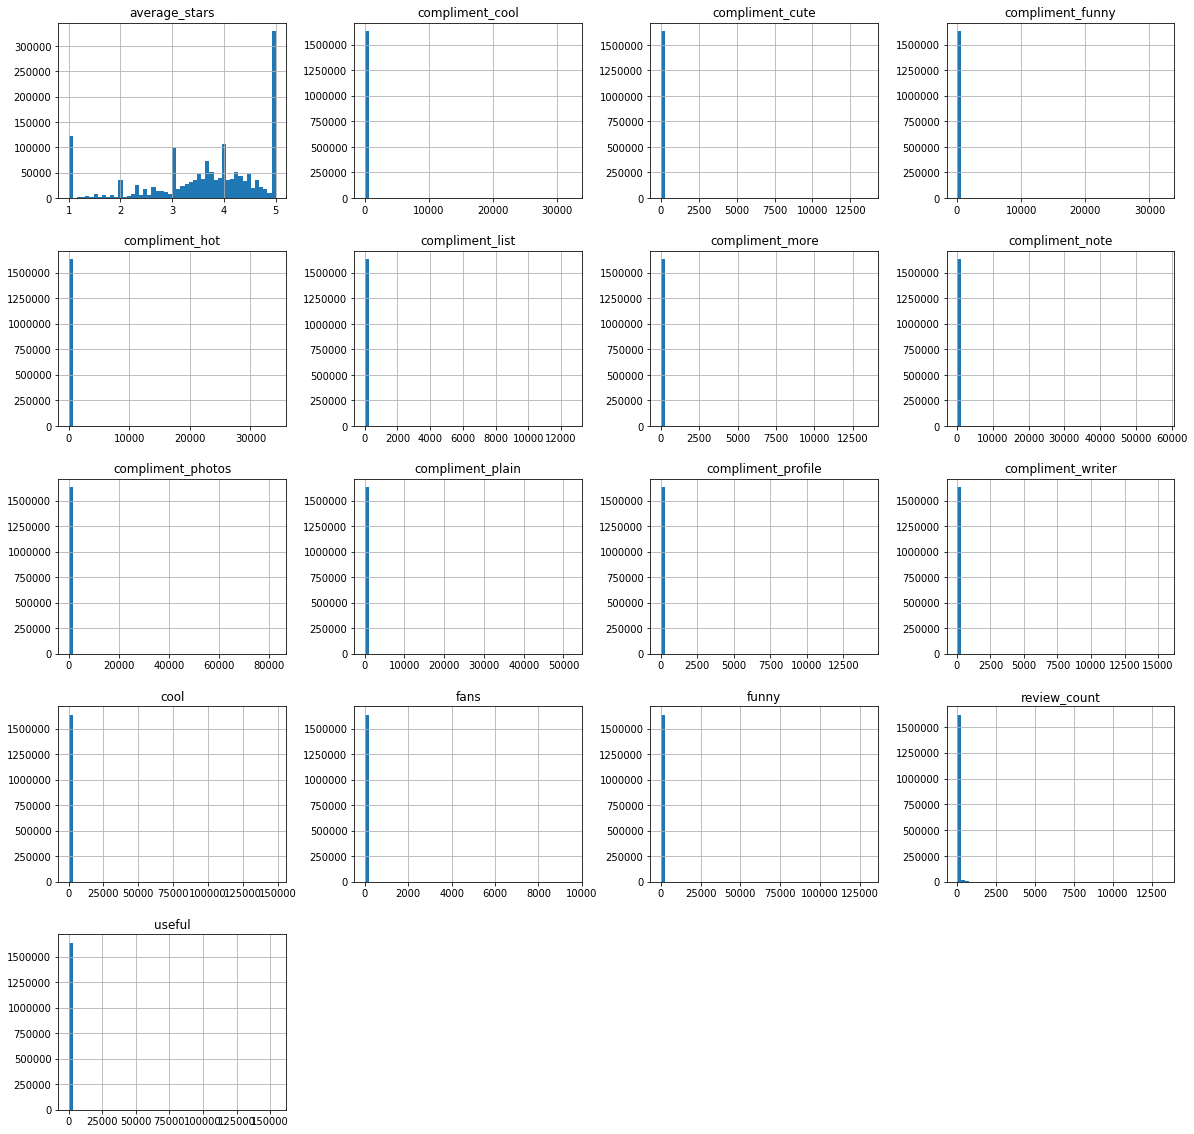

In [14]:
user_df.hist(bins=50, figsize=(20,20));

In [15]:
user_df.to_csv("user.csv",index=False)

 ## Merge Data

In [16]:
merged_df= pd.merge(review_df[1:400000],user_df,on="user_id",how="inner")

In [17]:
merged_df.head(5)

,business_id,cool_x,date,funny_x,review_id,stars,text,useful_x,user_id,average_stars,...,compliment_writer,cool_y,elite,fans,friends,funny_y,name,review_count,useful_y,yelping_since
0,NZnhc2sEQy3RmzKTZnqtwQ,0,2017-01-14 21:30:33,0,GJXCdrto3ASJOqKeVWPi6Q,5.0,I *adore* Travis at the Hard Rock's new Kelly ...,0,yXQM5uF2jS6es16SJzNHfg,3.97,...,2,67,2009,3,"6IAFtw20e4y99D2cA3jj9g, 33O8Q0BdTl-PXh2lKceYgg...",36,Jackie,68,178,2008-08-26 20:56:20
1,WTqjgwHlXbSFevF32_DJVw,0,2016-11-09 20:09:03,0,2TzJjDVDEuAW6MR5Vuc1ug,5.0,I have to say that this office really has it t...,3,n6-Gk65cPZL6Uz8qRm3NYw,4.27,...,0,1,,1,"9YRFLVFVbHGAJ1weFx5zqw, hUgdQsMQPoNc3fa9VoMqWQ",1,Wilhelmina,10,13,2012-10-30 00:56:00
2,ikCg8xy5JIg_NGPx-MSIDA,0,2018-01-09 20:56:38,0,yi0R0Ugj_xUx_Nek0-_Qig,5.0,Went in for a lunch. Steak sandwich was delici...,0,dacAIZ6fTM6mqwW5uxkskg,4.00,...,0,0,,0,"zWEBQSaDqrB9l8AWGy06DQ, VDFV_x-IyCNkgtr2EB-VLw...",1,Simon,4,2,2016-09-26 21:56:30
3,b1b1eb3uo-w561D0ZfCEiQ,0,2018-01-30 23:07:38,0,11a8sVPMUFtaC7_ABRkmtw,1.0,Today was my second out of three sessions I ha...,7,ssoyf2_x0EQMed6fgHeMyQ,2.00,...,0,0,,0,"jrw1jRpoRgK6ZQ4Z5_hPng, GJgchmwqQghjuG14uWgIOA...",0,Reilly,2,7,2016-12-06 22:12:48
4,eU_713ec6fTGNO4BegRaww,0,2013-01-20 13:25:59,0,fdiNeiN_hoCxCMy2wTRW9g,4.0,I'll be the first to admit that I was not exci...,0,w31MKYsNFMrjhWxxAb5wIw,4.00,...,0,0,,0,None,0,A,1,0,2013-01-20 13:25:51


In [18]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 399999 entries, 0 to 399998
Data columns (total 30 columns):
business_id           399999 non-null object
cool_x                399999 non-null int64
date                  399999 non-null object
funny_x               399999 non-null int64
review_id             399999 non-null object
stars                 399999 non-null float64
text                  399999 non-null object
useful_x              399999 non-null int64
user_id               399999 non-null object
average_stars         399999 non-null float64
compliment_cool       399999 non-null int64
compliment_cute       399999 non-null int64
compliment_funny      399999 non-null int64
compliment_hot        399999 non-null int64
compliment_list       399999 non-null int64
compliment_more       399999 non-null int64
compliment_note       399999 non-null int64
compliment_photos     399999 non-null int64
compliment_plain      399999 non-null int64
compliment_profile    399999 non-null int64


In [19]:
merged_df.isna().sum()

business_id           0
cool_x                0
date                  0
funny_x               0
review_id             0
stars                 0
text                  0
useful_x              0
user_id               0
average_stars         0
compliment_cool       0
compliment_cute       0
compliment_funny      0
compliment_hot        0
compliment_list       0
compliment_more       0
compliment_note       0
compliment_photos     0
compliment_plain      0
compliment_profile    0
compliment_writer     0
cool_y                0
elite                 0
fans                  0
friends               0
funny_y               0
name                  0
review_count          0
useful_y              0
yelping_since         0
dtype: int64

In [21]:
merged_df.to_csv("data.csv",index=False)